<!-- trying html -->
<link href="https://fonts.googleapis.com/css?family=Tinos|Enriqueta|Noto+Serif|Arvo" rel="stylesheet"> 

<div style="font-family: 'Noto Serif', enriqueta, Tinos, 'Palatino Linotype', 'Book Antiqua', Palatino, serif;">
<span style="font-size: 120%; font-weight: bold;">If this is your first time running a Jupyter notebook, these are the essential 'getting started' concepts:</span><br>
<ul>
<li>The notebook is divided into steps called 'cells'.  Each cell has text for explanation or Python code that can be executed.<\li>

<li>'Executing' a text cell formats the text using html and/or markdown codes.</li>

<li>'Executing' a code cell executes the python code in the cell and displays any output.</li>
    
<li>Typically, the python code needs to be excuted in a top-to-bottom order. A later cell may generate errors or produce incorrect results, if the python code above it has not been executed.</li>

<li>Some python code may take a few seconds or even a few minutes to finish executing. There should be an indicator that the cell is still execution.  In this notebook, the more coins you specify and the more random flips you specify, the longer the execution will require.</li>
    
<li>To execute the high-lighted cell, click once on the 'Run' button. This also advances to the next cell, so you can then click again once the first cell has finished.<br>
You can also try the keyboard combination of <i>[shift]+[enter]</i>.<br>
You can also use the menu elements to execute one cell, or a set of cells.</li>
</ul>
</div>

# Simulation of Randomly Flipped Coins
The python code below calculates and plots the results of random coin flips of a fixed number of coins.
You will need to enter the number of coins and the number of random filps.

The computer generated random numbers are different eveytime you run this simulation, so expect somewhat different results for repeated executions.

In [9]:
## load some packages to do the heavy work.
import numpy as np
import matplotlib.pyplot as plt
import random as r
import math

## math.comb is in Python 3.8, but we need to define it for earlier versions.
if hasattr( math, "comb" ):
    from math import comb
    from math import comb as nCr
else:
    def nCr(n,r):
        ''' calculate number of combinations of r from n items.'''
        f = math.factorial
        return f(n) // f(r) // f(n-r)
    comb = nCr    


def entropy(n,r):
    '''Calculate "sim entropy" for r from n items.
       e.x. 6 heads from 20 coins.
       This is 1/k_B times the usual entropy value.'''
    return math.log( nCr(n,r))

    

In [10]:
##  read the number of coins and the number of random flips
coinnum = int( input( 'Please enter the number of coins (positive whole number):'))
flipnum = int( input( 'please enter the number of random flips (positive whole number):'))

#### Initialize array that holds simulated coins. A '1' represents a head and a '0' represents a tail.
coins = np.ones( coinnum)  ## Using '1' to indicate a head, so setting all to heads.

## Initialize array that holds the number of heads after each flip.
headscount = np.zeros( flipnum+1)  ## extra space is to hold the zero'th flip.
headscount[ 0] = coinnum   ## starting with all heads.

entropyvalue = np.zeros( flipnum+1)  ## holds entropy for each flip
entropyvalue[ 0] = 0  ## entropy of all heads.

Please enter the number of coins (positive whole number): 777
please enter the number of random flips (positive whole number): 6666


In [11]:
## run the random coin flip for the number of times specified.

for flip in range( 1, flipnum+1): ## last pass through loop is when flip is flipnum
    
    n = r.randint( 0, coinnum-1)  ## randomly pick a coin

    ## Here we use 0 for tails and 1 for heads.
    if coins[ n]!=0.0:
        coins[ n] = 0.0
    else:
        coins[ n] = 1.0
    
    headscount[ flip] = coins.sum()  ## counts number of heads.
    entropyvalue[ flip] = entropy( coinnum, coins.sum())
    

##print( 'DBug headscount:\n {}'.format( headscount))

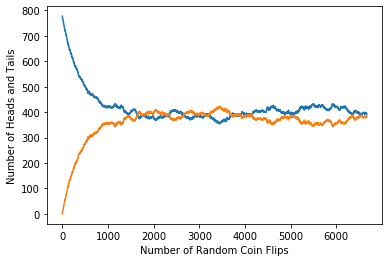

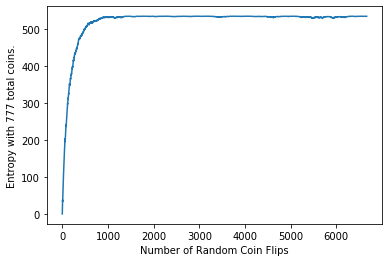

In [15]:
## Plot heads vs flip number and entropy vs flip number

flipcount = np.arange(0, flipnum+1)
plt.plot( flipcount, headscount)
tailscount = coinnum - headscount
plt.plot( flipcount, tailscount)
plt.xlabel( 'Number of Random Coin Flips')
plt.ylabel( 'Number of Heads and Tails')
plt.show()

plt.plot( flipcount, entropyvalue)
plt.xlabel( 'Number of Random Coin Flips')
plt.ylabel( 'Entropy with {} total coins.'.format( coinnum))
plt.show()
           